## Table Of Contents

1. Preparing Data
2. Model Building
3. Training
4. Inference
5. Saving the Model

In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.0.0+cpu'

## Data Preparation

In [2]:
w = 0.3
b = 0.9

x = torch.arange(0, 1, 0.01).unsqueeze(dim = 1)
y = w * x + b

In [3]:
train_size = int(len(x) * 0.8)
x_train = x[: train_size]
y_train = y[: train_size]
x_test = x[train_size:]
y_test = y[train_size:]

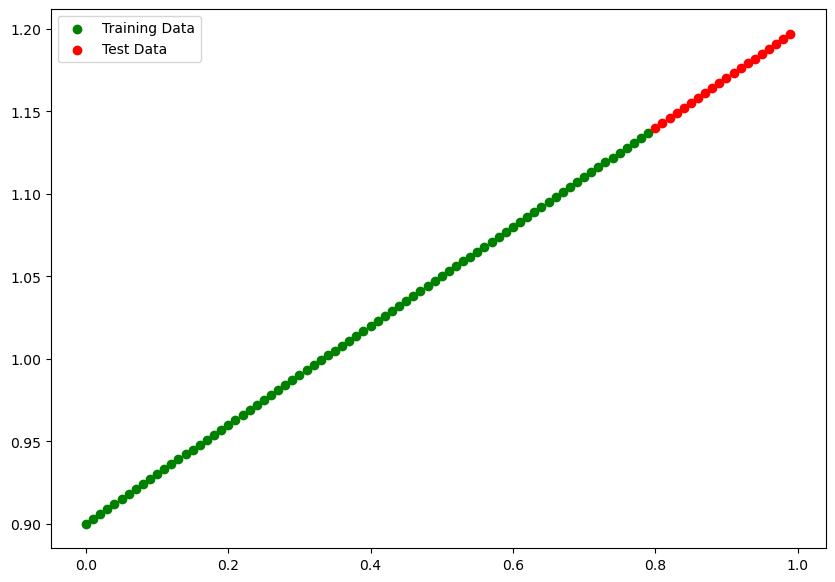

In [4]:
def plot_predictions(x_train= x_train, y_train = y_train, x_test = x_test, y_test = y_test, predictions = None):
    plt.figure(figsize = (10, 7))
    plt.scatter(x_train, y_train, color = 'g', label= "Training Data")
    plt.scatter(x_test, y_test, color = 'r', label= "Test Data")
    if predictions is not None:
        plt.scatter(x_test, predictions, color = 'orange', label = "Predictions")
    
    plt.legend()
    
plot_predictions()

## Model Building

In [5]:
class LinearRegression(nn.Module):
    
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, dtype= torch.float), requires_grad= True)
        self.bias = nn.Parameter(torch.randn(1, dtype = torch.float), requires_grad = True)
        
    def forward(self, x:torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias

In [6]:
torch.manual_seed(42)
model_1 = LinearRegression()
model_1.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [7]:
with torch.inference_mode():
    y_pred = model_1(x_test)

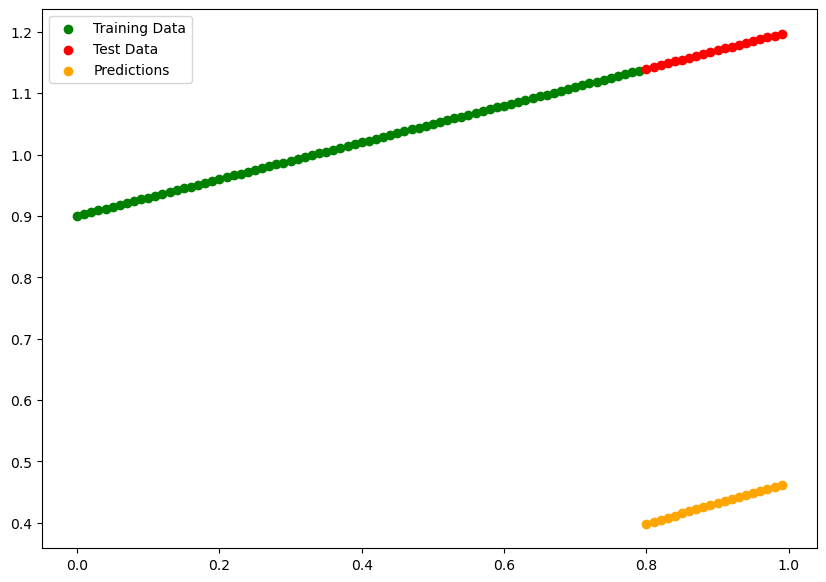

In [8]:
plot_predictions(predictions = y_pred)

## Model Training

In [9]:
loss_function = nn.L1Loss()
optimizer = torch.optim.SGD(params = model_1.parameters(), lr= 0.01)

In [10]:
epochs = 300
epoch_count = []
training_loss = []
test_loss_values = []

for i in range(epochs):
    
    model_1.train()
    y_pred = model_1(x_train)
    optimizer.zero_grad()
    loss = loss_function(y_pred, y_train)
    loss.backward()
    optimizer.step()
    
    model_1.eval()
    with torch.inference_mode():
        test_pred = model_1(x_test)
        test_loss = loss_function(test_pred, y_test.type(torch.float))
        
        if i % 20 == 0:
            epoch_count.append(i)
            training_loss.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {i} || Train MAE: {loss} || Test MAE: {test_loss}")

Epoch: 0 || Train MAE: 0.7566978335380554 || Test MAE: 0.7248174548149109
Epoch: 20 || Train MAE: 0.5254928469657898 || Test MAE: 0.4541124403476715
Epoch: 40 || Train MAE: 0.2942880392074585 || Test MAE: 0.18340764939785004
Epoch: 60 || Train MAE: 0.07658576965332031 || Test MAE: 0.07274086028337479
Epoch: 80 || Train MAE: 0.05255373567342758 || Test MAE: 0.11581540107727051
Epoch: 100 || Train MAE: 0.045542728155851364 || Test MAE: 0.10467890650033951
Epoch: 120 || Train MAE: 0.03868866711854935 || Test MAE: 0.08938358724117279
Epoch: 140 || Train MAE: 0.03183453157544136 || Test MAE: 0.07408786565065384
Epoch: 160 || Train MAE: 0.024982359260320663 || Test MAE: 0.0581042543053627
Epoch: 180 || Train MAE: 0.018130185082554817 || Test MAE: 0.04212062805891037
Epoch: 200 || Train MAE: 0.011278990656137466 || Test MAE: 0.02579306997358799
Epoch: 220 || Train MAE: 0.004429381340742111 || Test MAE: 0.009467745199799538
Epoch: 240 || Train MAE: 0.00370177929289639 || Test MAE: 0.0064894435

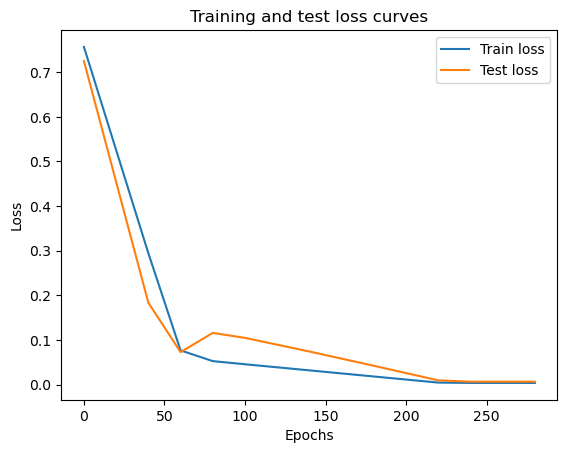

In [11]:
plt.plot(epoch_count, training_loss, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [12]:
model_1.state_dict()

OrderedDict([('weights', tensor([0.3067])), ('bias', tensor([0.9011]))])

## Making Predictions

In [13]:
model_1.eval()
with torch.inference_mode():
    y_pred = model_1(x_test)

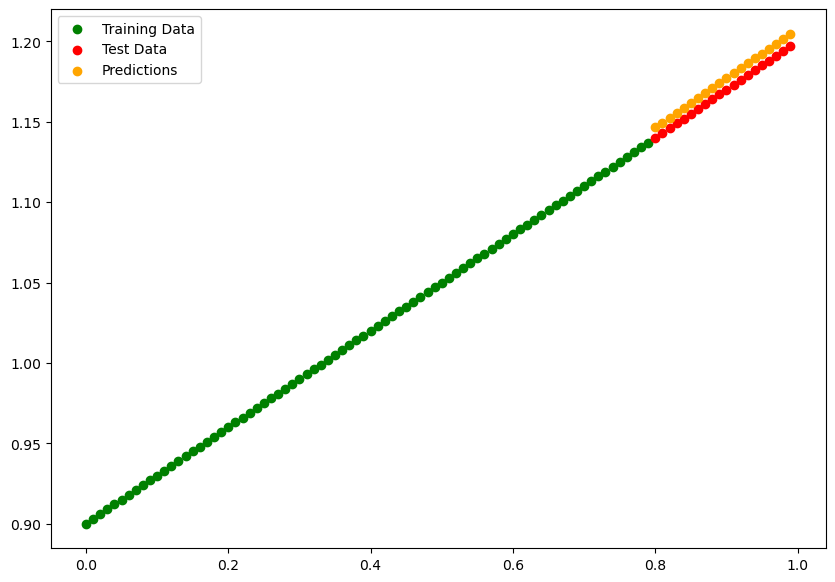

In [14]:
plot_predictions(predictions = y_pred)

## Saving and loading the model

In [15]:
from pathlib import Path

model_path = Path("model")
model_path.mkdir(parents = True, exist_ok = True)

model_name = "model_1.pth"
model_path = model_path / model_name

In [16]:
torch.save(obj = model_1.state_dict(), f = model_path)

In [17]:
loaded_model_1 = LinearRegression()
loaded_model_1.load_state_dict(torch.load(f=model_path))

<All keys matched successfully>

In [18]:
loaded_model_1.eval()
with torch.inference_mode():
    loaded_model_1_preds = loaded_model_1(x_test)
y_pred == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])